In 2014, the World Health Organization (WHO) estimated 422 million people are suffering from diabetes. Diabetes is an illness that occurs when your blood glucose is too high. Its effects can damage your body’s organs. It is caused by either an issue with your immune system or a bad lifestyle, such as overweight or physical inactivity.


This **dataset** is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.


The dataset is composed of:


* Pregnancies: Number of time pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* Blood Pressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skinfold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* Diabetes pedigree function: Diabetes pedigree function
* Age: Age(years)
* Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image
import os
!ls ../input/

In [ ]:
df = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
df.head()

In [ ]:
df.info()

# # Exploratory Data Analysis

In [ ]:
df.shape

In [ ]:
df.describe()

In [ ]:
df.isna().sum()

**Dataframe.desccribe()** is used to get a data frame summary. It only counts numerical values, excluding categorical and NaN values. From this approach, we have a high-level summary of the dataset and understand each column's distribution.
Moreover, with a deeper look at the tale, we noticed some columns with a minimum value of 0, such as glucose blood pressure, skin, insulin, and BMI. These values are not realistic. To make it more logical, we will replace them with Nan value.

In [ ]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [ ]:
df.isna().sum()

In [ ]:
df['Glucose'].fillna(df['Glucose'].median(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].median(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)
df['BMI'].fillna(df['BMI'].median(), inplace = True)

In case of outlier, we decide to replace the missing value with the median

In [ ]:
ax = sns.catplot('Outcome', data=df, kind='count')
ax.set(xticklabels = ["No", "Yes"])

plt.ylabel('Number of Case')
plt.title('Diabete Distribution')

#the data is good? should we get an equal distribution of the sick people

There are not as many diabetes patients as non-diabetes patients. We called it **Imbalanced Data**. It is common in medical diagnosis and fraud due to a small number of cases.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

df.hist(figsize=(10,20))

In [ ]:
corr=df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.set(font_scale=1.15)
plt.figure(figsize=(16, 9))

sns.heatmap(corr, mask=mask,square=True,annot=True,cmap='YlGnBu',)

plt.title('Correlation between features')

In [ ]:
#### add some graph that compare the outcome to the most important feature
#pregnancy, glucose, BMI, age

In [ ]:
X = df.drop(['Outcome'], axis = 1)
y = df['Outcome']

**Supervised Machine Learning**, is where you have a target variable(output) and predictor variable(input). You use an algorithm to obtain the map function that lets you know which variables and in which ranges have located the probability of getting diabetes. 

In our case, we use **eager learning** algorithm with a support vector machine and random forest tree, and lazy learning algorithm, with K-nearest neighbors. What is all of this? The first one attempts to create an explicit, concise, and generalized description of a phenome from the training set. Whereas, **lazy learning**, also called instance-based learning, compared instance to instance, which has been stored and memorized train data. It infers hypotheses directly from the training instances themselves. Let’s see their philosophy with some graphs!

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
column = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']

from sklearn.preprocessing import StandardScaler
ss = StandardScaler(with_mean=True, with_std=True)
dfnumss = pd.DataFrame(ss.fit_transform(X_train[column]), columns=['ss_'+x for x in column], index = X_train.index)
X_train = pd.concat([X_train, dfnumss], axis=1)
X_train = X_train.drop(column, axis=1)

In [ ]:
dfnumss = pd.DataFrame(ss.transform(X_test[column]), columns=['ss_'+x for x in column], index = X_test.index)
X_test = pd.concat([X_test, dfnumss], axis=1)
X_test = X_test.drop(column, axis=1)


**What is  Support Vector Machine(SVM)?**

SVM is a supervised machine for classification and regression models. SVMs are based on the idea of finding a line or called hyperplane when you have more than two variables that best divide a dataset into X classes, where X is the number of Target. (i.e. to have or not diabetes).

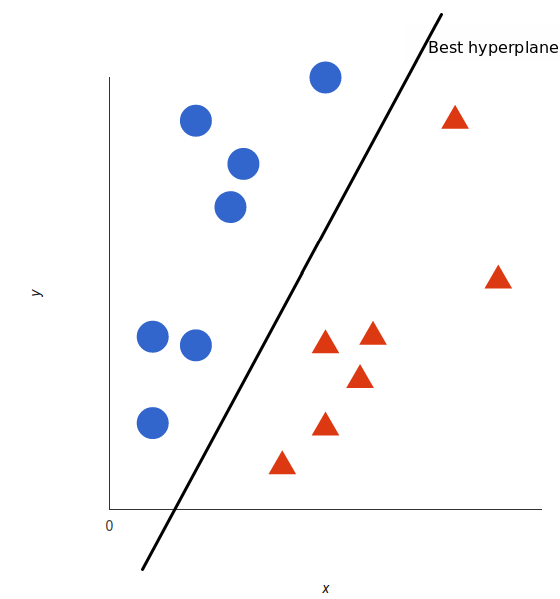


**Analogy**

For instance, you are at the zoo and want to see a crocodile. However, you are confused with two similar animals, crocodile and alligator. After looking at the patterns, you will notice which one is the crocodile and start looking at it. Same as you, support vector machines work. It looks at data and sorts it into one of the two categories. In our case, the algorithm will try to find which characteristics make you more likely to have or not diabetes. Then the hyperplane is like a cut-off that places you in a side or another.

**Pros & Cons**

This algorithm's advantage is that it performs better in a higher dimension and barely impacts outliers. However, it takes time to process with a large dataset, and difficult to target appropriate the hyperparameters.

![](http://)

In [ ]:
from sklearn.svm import SVC

svc = SVC()     
svc.fit(X_train, y_train)                                                        
y_pred = svc.predict(X_test)    


In [ ]:
from sklearn import metrics

print (metrics.accuracy_score(y_test, y_pred))
print (metrics.confusion_matrix(y_test, y_pred))
print (metrics.classification_report(y_test, y_pred))

**What is Random Forest?**

The random forest consists of a large number of individual decision trees that operate as an ensemble. Each tree in the random forest spits out a class prediction, and the class with the most votes becomes our model's prediction.

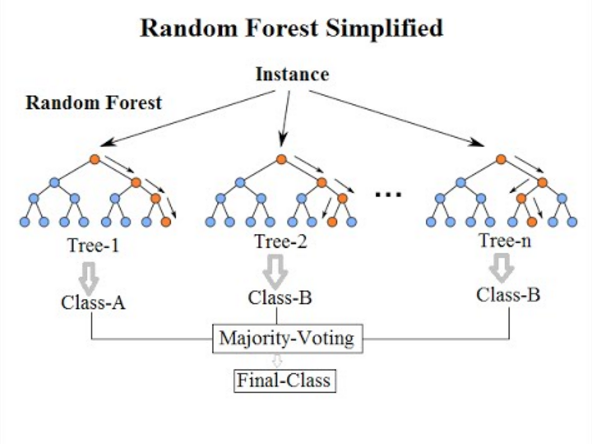

**Analogy**

You are looking for a new book based on your friend's recommendation. The first time, your relative will ask multiple questions about your taste until he advised you a book. Then, you repeat this process multiples times with similar and different questions through other friends. In the end, you decide your book according has been recommended most of the time.

**Pros & Cons**

Implementing an RFC is its ability to reduce errors, and it has a good performance with imbalanced data. However, it tends to overfit when it dealings with irrelevant data, and its results may be biased when you have categorical data.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test) 


In [ ]:
print (metrics.accuracy_score(y_test, y_pred))
print (metrics.confusion_matrix(y_test, y_pred))
print (metrics.classification_report(y_test, y_pred))

**What is K-nearest neighbors(KNN)?**

KNN is a model that classifies data points based on the points that are most similar to it, the neighbor more similar to you. It uses test data to make an "educated guess" on what an unclassified point should be classified as.

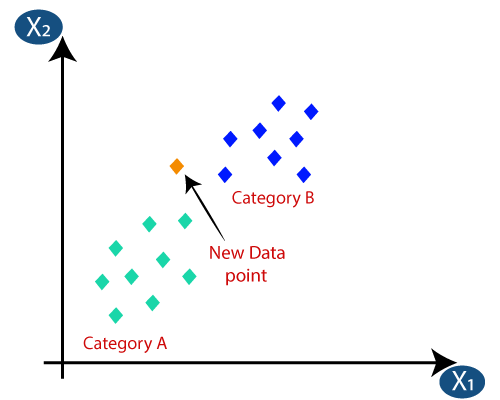


**Analogy**

For instance, a book store will recommend you a book by associating your taste with similar customers.  You share similar tastes with Thomas, another customer. Thomas just bought and loved his new book. Next time you go to the shop, the bookseller will suggest the same book as Thomas. KNN is frequently used as a recommendation system. In our example, the algorithms will look at the profile of those with diabetes and test if one person has a similar profile to those with diabetes. 

**Pros & Cons**

This algorithm's main advantages are that it does not need assumption to process, and with its memory-based approach, it always evolves with a new dataset. However, as the variables grow, the model will be slower to process and less accurate. Also, the data need to be homogenous, which means a feature from another needs the same scale.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier                                                            

knn = KNeighborsClassifier() 
knn.fit(X_train, y_train)                                                                                                            
y_pred = knn.predict(X_test) 

In [ ]:
print (metrics.accuracy_score(y_test, y_pred))
print (metrics.confusion_matrix(y_test, y_pred))
print (metrics.classification_report(y_test, y_pred))


In [ ]:
from sklearn.feature_selection import SelectFromModel

**Feature Importance**

Feature importance refers to a method that evaluates the impact of your variable in your prediction model. It can be either used for the numerical or categorical value. Its goal is to understand better the model and data, which are the most relevant and in the opposite way, which are not contributed. As a next step, you may gather more or different data.

In [ ]:

from sklearn.inspection import permutation_importance
from matplotlib import pyplot


knn.fit(X_train, y_train)
results = permutation_importance(knn, X_train, y_train, scoring='accuracy')
importance = results.importances_mean

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

pyplot.barh([x for x in range(len(importance))],importance, color = 'green', align='center')
plt.ylabel("The Variables")
plt.xlabel("Score")
plt.title("Feature Importance from KNN")
pyplot.show()



Glucose is the variable that explains the most of our model.